**Random Forrest for Project*

In [115]:
# Load all dependencies and the data
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [116]:
# Add a new column with the country names.
# This is what we are going to try to predict.
# data['country'] = pd.Categorical.from_codes(country, country_names)
    #error


In [117]:
# Convert the country names to a digit (0, 1, 2) for each class.
df['country'] = pd.factorize(df['country'])[0]
df.head(90)

,Unnamed: 0,country,year,trade_co2,cement_co2,cement_co2_per_capita,coal_co2,coal_co2_per_capita,flaring_co2,flaring_co2_per_capita,...,share_global_cumulative_coal_co2,share_global_cumulative_flaring_co2,share_global_cumulative_gas_co2,share_global_cumulative_oil_co2,share_global_cumulative_other_co2,"PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)",Deaths - Cause: All causes - Risk: Outdoor air pollution - OWID - Sex: Both - Age: All Ages (Number),rate Deaths - Cause: All causes - Risk: Outdoor air pollution - OWID - Sex: Both - Age: All Ages (Number),category,is_train
0,0,0,1990,-203.224,22.801,0.036,295.760,0.472,20.795,0.033,...,1.91,16.08,0.86,1.92,NaN,46.719096,169060,26.820034,Africa,False
1,1,0,1991,-213.043,24.426,0.038,306.508,0.475,20.799,0.032,...,1.94,15.81,0.92,1.94,NaN,46.530559,173284,26.768455,Africa,False
2,2,0,1992,-183.457,24.904,0.038,288.587,0.436,23.351,0.035,...,1.97,15.65,0.96,1.97,NaN,46.342022,177903,26.771976,Africa,True
3,3,0,1993,-208.188,24.609,0.036,318.855,0.469,21.790,0.032,...,2.00,15.48,1.01,2.00,NaN,46.153485,183152,26.860278,Africa,True
4,4,0,1994,-215.113,25.111,0.036,330.702,0.473,21.797,0.031,...,2.03,15.32,1.05,2.02,NaN,45.964949,188664,26.973370,Africa,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,85,3,1991,-105.543,52.197,0.122,1948.180,4.540,57.573,0.134,...,28.90,17.16,51.73,38.30,28.75,9.528191,109722,25.359643,North America,True
86,86,3,1992,-17.972,52.877,0.122,1973.354,4.542,58.698,0.135,...,28.80,17.37,50.85,38.00,27.19,9.501610,109047,24.889542,North America,True
87,87,3,1993,-71.251,55.585,0.126,2026.203,4.605,59.008,0.134,...,28.70,17.57,50.02,37.73,25.88,9.475030,111159,25.055436,North America,False
88,88,3,1994,-73.819,59.479,0.134,2044.334,4.588,59.804,0.134,...,28.61,17.77,49.28,37.49,24.84,9.448450,111941,24.913506,North America,True


Let's now split the entire dataset into a training and testing set.

In [118]:
df['is_train'] = np.random.uniform(0, 1, len(df)) <= 0.75
df.head()

train_df = df[df['is_train']]
test_df  = df[df['is_train']]

print('Length of train data:', len(train_df))
print('Length of test data :', len(test_df))

Length of train data: 79
Length of test data : 79


Let's now construct the features (input to Decision Tree) and the classes (target of the Decision Tree).

In [119]:
features = df.columns[3:10]
features

Index(['trade_co2', 'cement_co2', 'cement_co2_per_capita', 'coal_co2',
       'coal_co2_per_capita', 'flaring_co2', 'flaring_co2_per_capita'],
      dtype='object')

In [120]:
targets  = df.columns[12]
targets

'oil_co2'

We can construct a Decision Tree object and train it.

In [121]:
df = pd.DataFrame(df)


In [122]:
df.values.tolist() # as list

[[0,
  0,
  1990,
  -203.224,
  22.801,
  0.036,
  295.76,
  0.472,
  20.795,
  0.033,
  75.954,
  0.121,
  243.984,
  0.39,
  nan,
  nan,
  -5.71,
  -39.926,
  0.468,
  0.249,
  456.07,
  0.728,
  0.323,
  15930.837,
  421.839,
  8354.438,
  1313.871,
  674.894,
  5165.796,
  nan,
  -30.82,
  2.9,
  4.57,
  3.39,
  8.22,
  1.98,
  2.65,
  nan,
  1.97,
  3.48,
  1.91,
  16.08,
  0.86,
  1.92,
  nan,
  46.71909567,
  169060,
  26.82003403,
  'Africa',
  True],
 [1,
  0,
  1991,
  -213.043,
  24.426,
  0.038,
  306.508,
  0.475,
  20.799,
  0.032,
  78.466,
  0.122,
  258.828,
  0.401,
  nan,
  nan,
  4.51,
  29.731,
  0.472,
  0.259,
  475.983,
  0.738,
  0.326,
  16619.863,
  446.264,
  8660.946,
  1334.669,
  753.36,
  5424.624,
  nan,
  -30.92,
  2.97,
  4.77,
  3.55,
  7.77,
  2.0,
  2.67,
  nan,
  2.0,
  3.53,
  1.94,
  15.81,
  0.92,
  1.94,
  nan,
  46.53055893,
  173284,
  26.76845526,
  'Africa',
  False],
 [2,
  0,
  1992,
  -183.457,
  24.904,
  0.038,
  288.587,
  0.436,
  2

In [123]:
clf = DecisionTreeClassifier()


In [124]:
from sklearn import preprocessing
from sklearn import utils

#convert y values to categorical values
lab = preprocessing.LabelEncoder()




In [127]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
train_df = label_encoder.fit_transform(train_df)

ValueError: y should be a 1d array, got an array of shape (79, 50) instead.

In [128]:
clf.fit(train_df[features], train_df[targets])


ValueError: Unknown label type: 'continuous'

Now let's use the trained model to predict the class of test samples. Often it is useful to also display the probabilities with which the algorithm classifies a given sample.

In [82]:
DecisionTreeClassifier()

DecisionTreeClassifier()

In [84]:
clf.predict_proba(test_df[features])


AttributeError: 'DecisionTreeClassifier' object has no attribute 'tree_'

We can create a confusion matrix to show get a quick overview which classes are easy to predict and which ones are more difficult to distinguish.

In [85]:
predicted_species = clf.predict(test_data[features])
pd.crosstab(test_data['country'], 
            predicted_species,
            rownames=['Actual Country'], 
            colnames=['Predicted Country'])

NameError: name 'test_data' is not defined

Finally we can inspect which features are most important in the classification by reading out the feature importances.

In [86]:
fi = pd.DataFrame(clf.feature_importances_,
                  index=country.feature_names,
                  columns=['trade_co2'])
fi_sorted = fi.sort_values('coal_co2', ascending=False)
fi_sorted

# AttributeError: 'DecisionTreeClassifier' object has no attribute 'tree_'

AttributeError: 'DecisionTreeClassifier' object has no attribute 'tree_'

AttributeError: 'DecisionTreeClassifier' object has no attribute 'tree_'

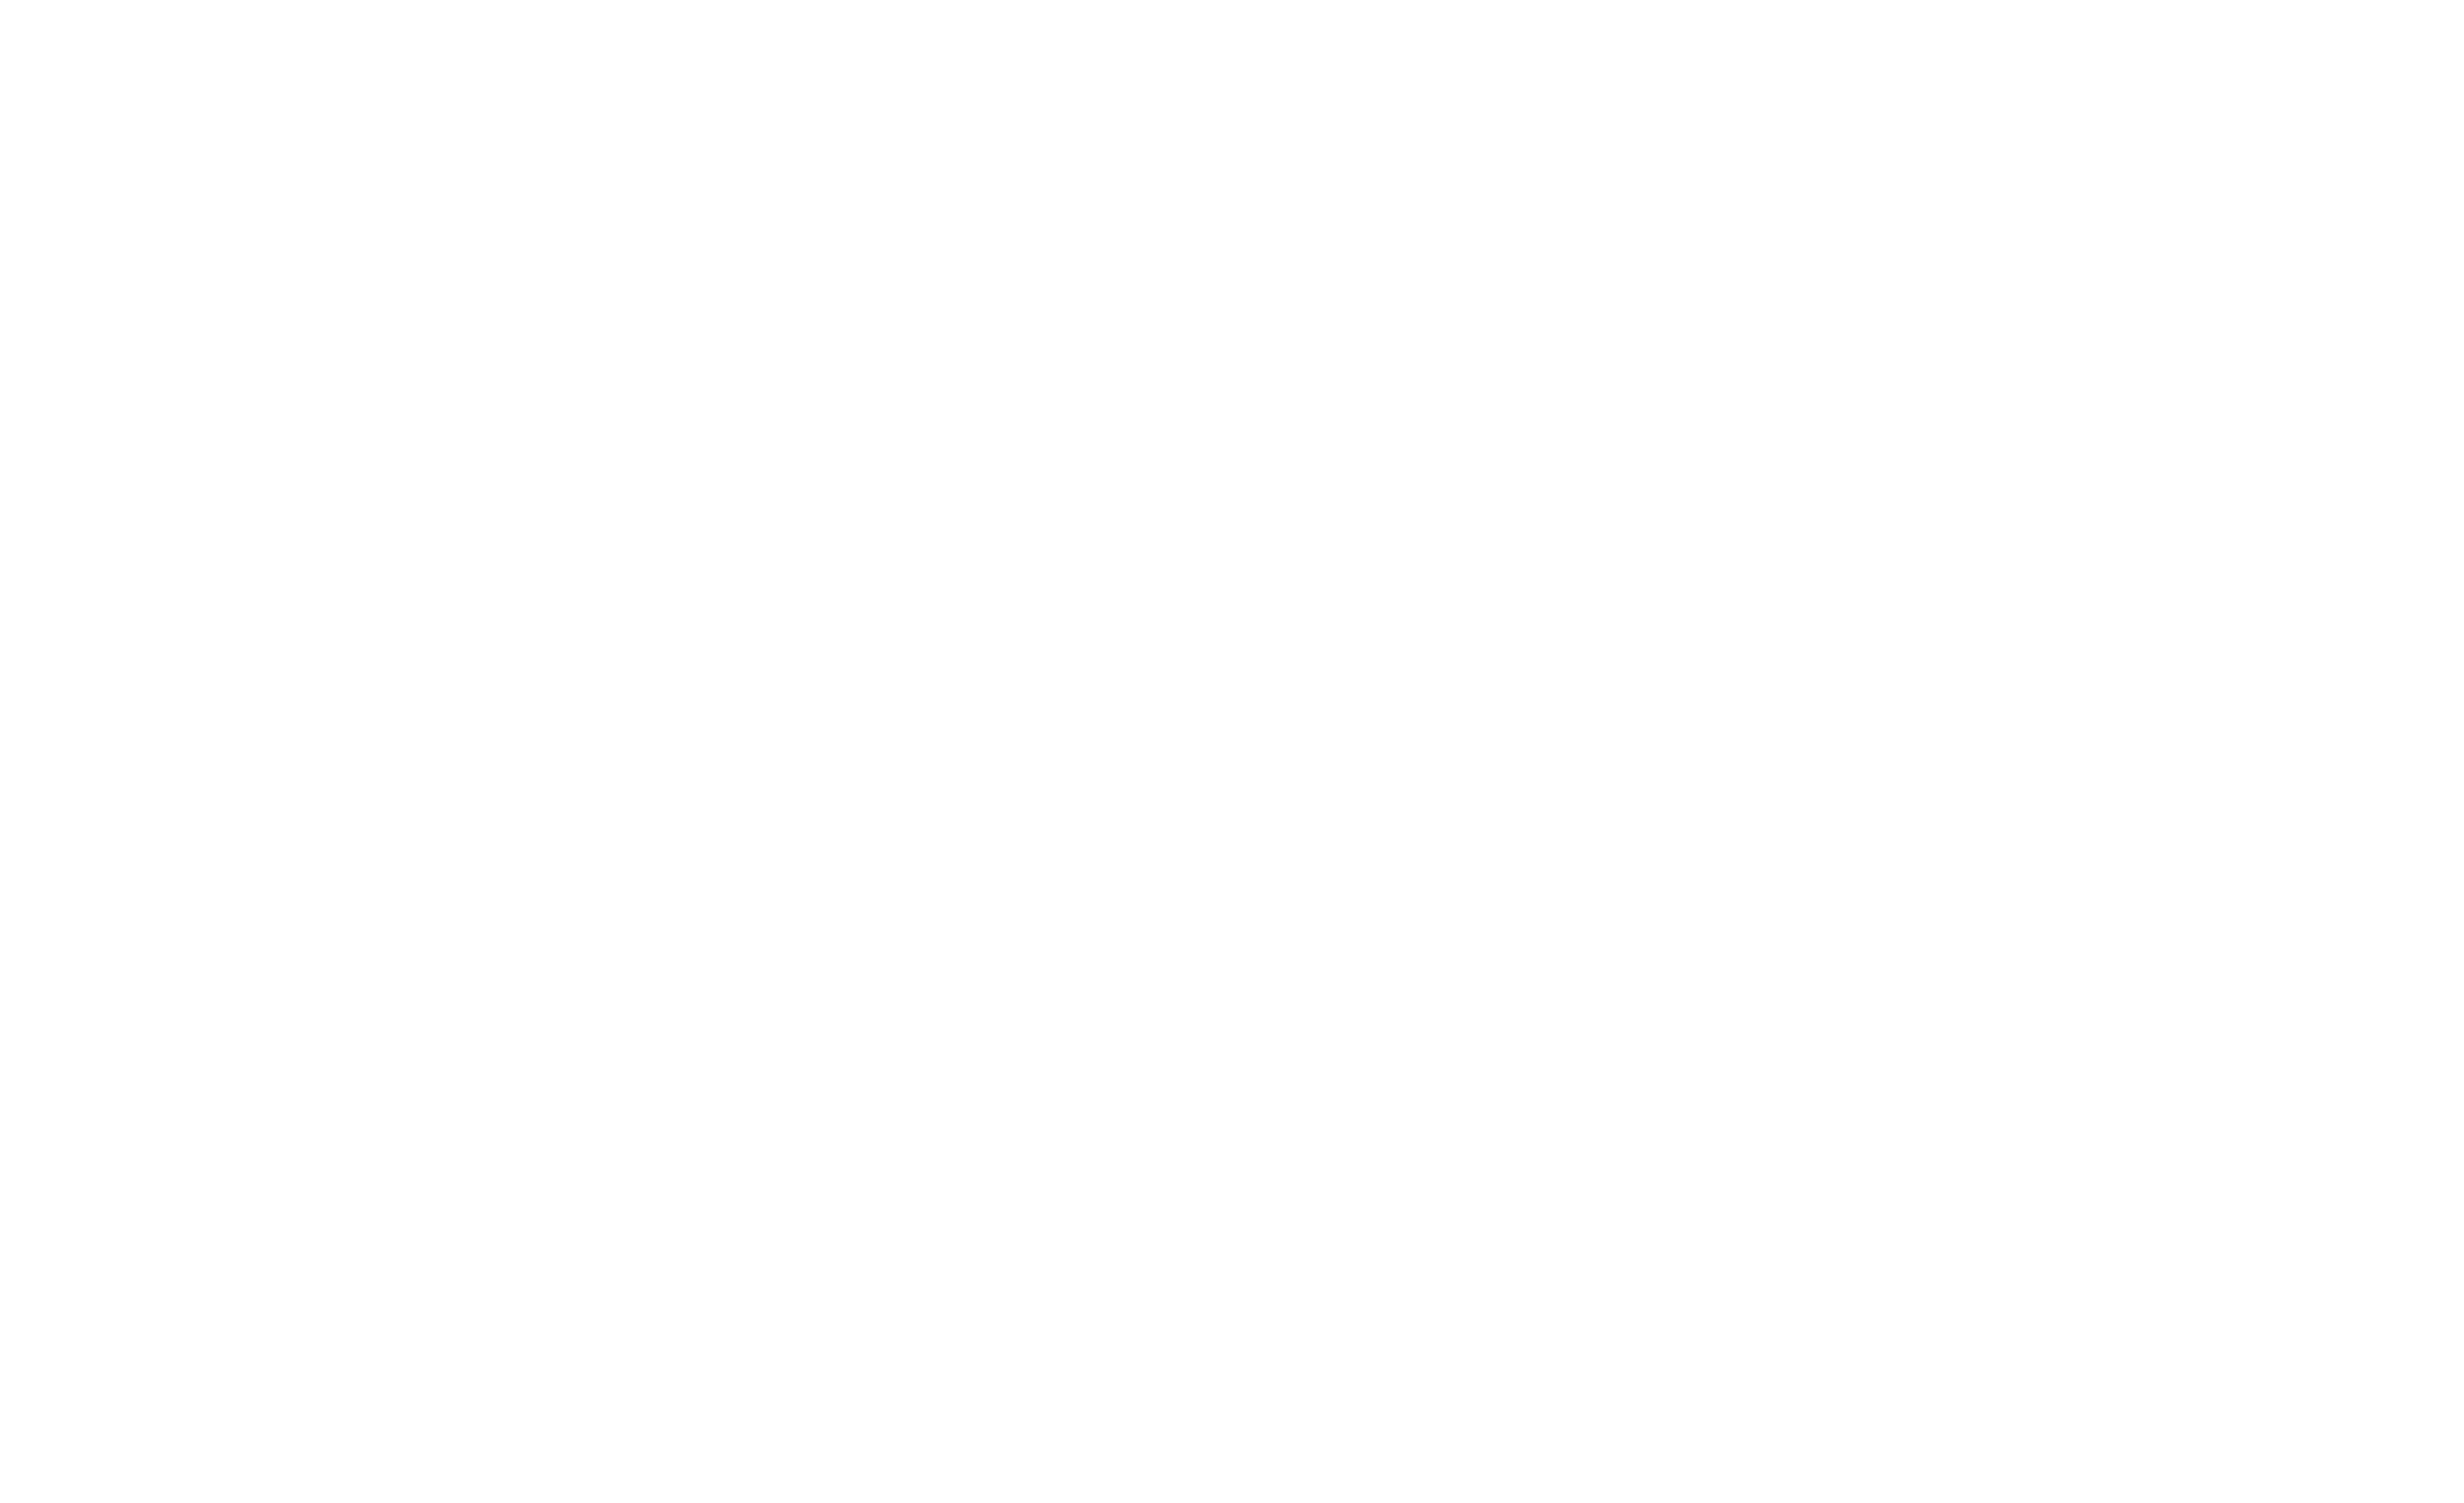

In [87]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 80,50
tree_fig = plot_tree(clf, filled=True)